<a href="https://colab.research.google.com/github/Stormbreaker06/Electricity-Demand-Time-Series-Analysis/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

from dateutil.parser import parse
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime as dt
import numpy as np
import math
from sklearn import preprocessing

In [26]:
import pandas as pd
import numpy as np
demand=pd.read_csv("IND_Demand.csv")
hourly=pd.read_excel("hourlyLoadDataIndia.xlsx")
monthly=pd.read_csv("india_monthly_electricity.csv")
print(demand.head())
print(" ")
print(hourly.head())
print(" ")
print(monthly.head())

         Date  Demand (TWh)
0  2019-01-01        109.52
1  2019-02-01         99.98
2  2019-03-01        116.03
3  2019-04-01        118.25
4  2019-05-01        128.39
 
             datetime  National Hourly Demand  Northen Region Hourly Demand  \
0 2019-01-01 00:00:00               118690.67                      33692.02   
1 2019-01-01 01:00:00               116029.23                      32534.39   
2 2019-01-01 02:00:00               114044.14                      31730.37   
3 2019-01-01 03:00:00               113648.97                      31529.25   
4 2019-01-01 04:00:00               116290.05                      32406.61   

   Western Region Hourly Demand  Eastern Region Hourly Demand  \
0                      38522.22                      13128.89   
1                      38071.09                      12737.53   
2                      37680.10                      12387.36   
3                      37747.37                      12301.12   
4                      38101.8

In [65]:
demand['Date']=pd.to_datetime(demand['Date'])
demand.set_index('Date')
print(demand.head())

   level_0  index       Date  Demand (TWh)
0        0      0 2019-01-01        109.52
1        1      1 2019-02-01         99.98
2        2      2 2019-03-01        116.03
3        3      3 2019-04-01        118.25
4        4      4 2019-05-01        128.39


In [66]:
print("Missing values in the dataset:")
print(demand.isnull().sum())

Missing values in the dataset:
level_0         0
index           0
Date            0
Demand (TWh)    0
dtype: int64


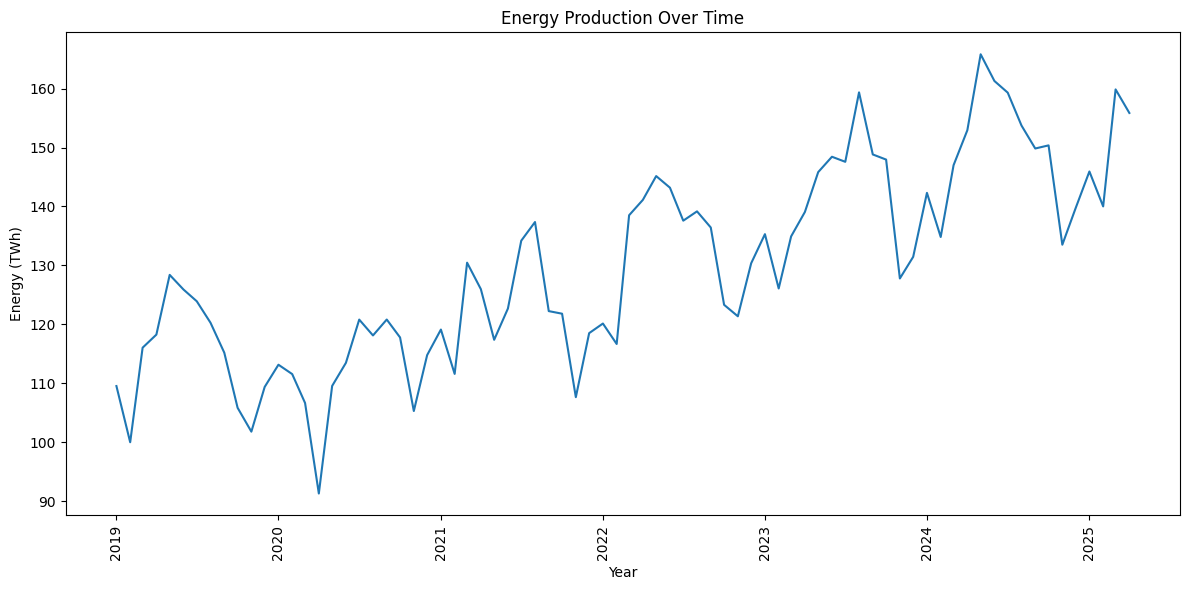

In [67]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(12, 6)) # Set the figure size for better readability
plt.plot(demand['Date'], demand['Demand (TWh)'])

# Add title and labels
plt.title('Energy Production Over Time')
plt.xlabel('Year')
plt.ylabel('Energy (TWh)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In [68]:
demand.describe()

,level_0,index,Date,Demand (TWh)
count,76.000000,76.000000,76,76.000000
mean,37.500000,37.500000,2022-02-14 20:12:37.894736896,129.795263
min,0.000000,0.000000,2019-01-01 00:00:00,91.280000
25%,18.750000,18.750000,2020-07-24 06:00:00,117.670000
50%,37.500000,37.500000,2022-02-15 00:00:00,128.085000
75%,56.250000,56.250000,2023-09-08 12:00:00,142.530000
max,75.000000,75.000000,2025-04-01 00:00:00,165.830000
std,22.083176,22.083176,NaN,16.849956


In [69]:

#demand = pd.read_csv("IND_Demand.csv", parse_dates=['DATE'], index_col='DATE')
# Multiplicative Decomposition
result_mul = seasonal_decompose(demand['Demand (TWh)'], model='multiplicative', period=12)
# Additive Decomposition
result_add = seasonal_decompose(demand['Demand (TWh)'], model='additive', period=12)

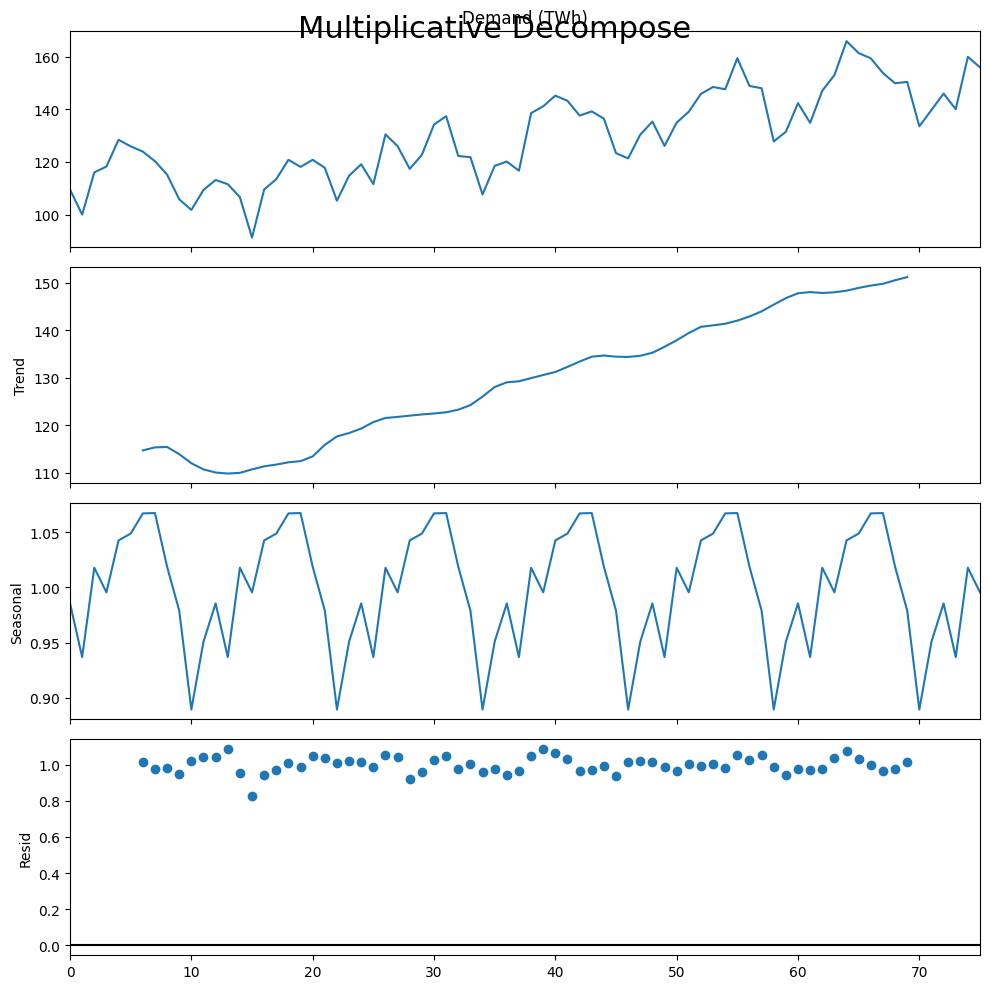

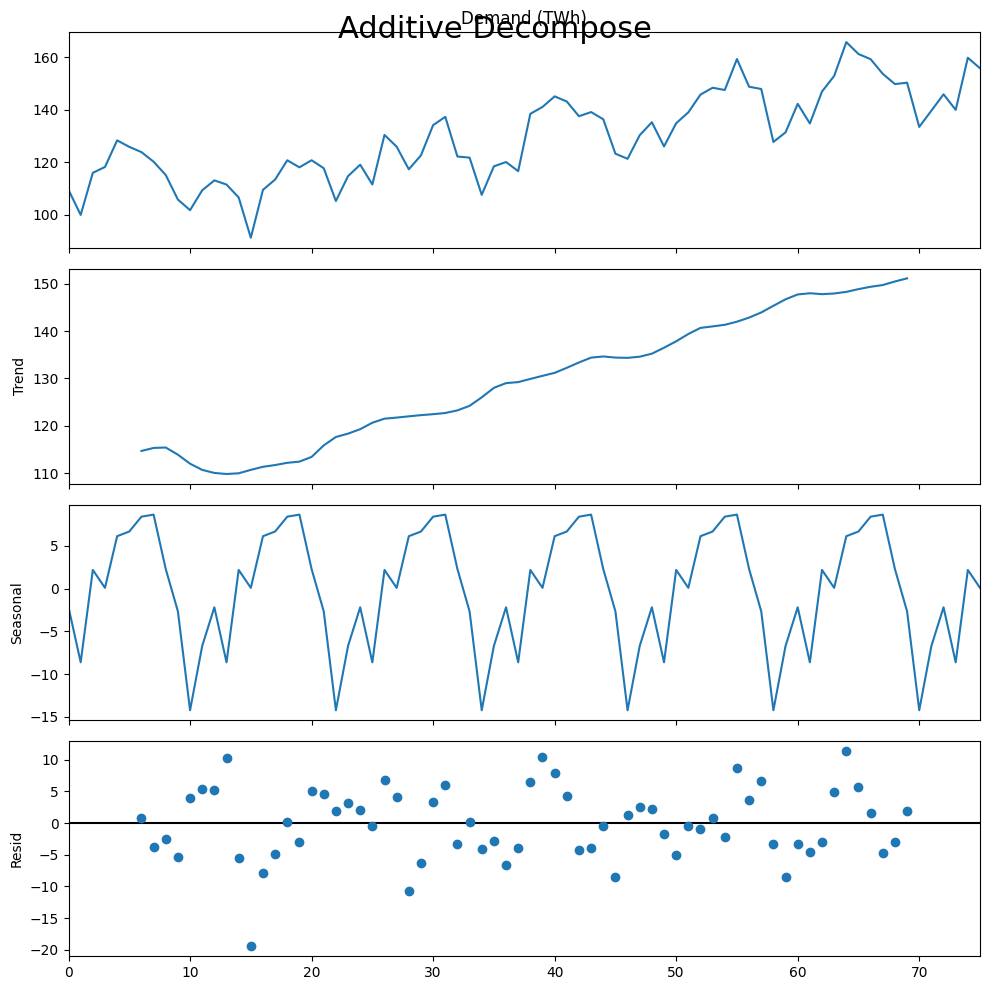

In [70]:
#Plot

plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#import pmdarima as pm
# Model fit
model = SARIMAX(demand['Demand (TWh)'], order=(1, 1, 1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)
model_fit.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Demand (TWh)   No. Observations:                   76
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -211.146
Date:                            Tue, 14 Oct 2025   AIC                            432.293
Time:                                    18:13:30   BIC                            443.008
Sample:                                         0   HQIC                           436.507
                                             - 76                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5918      0.164      3.603      0.000       0.270       0.914
ma.L1         -0.9707      0.280     -3.470      0.001      -1.519      -0.422
ar.S.L12      -0.0570      0.177     -0.323      0.747      -0.403       0.289
ma.S.L12      -0.9985     76.743     -0.013      0.990    -151.412     149.415
sigma2        31.5860   2417.726      0.013      0.990   -4707.069    4770.241
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 2.87
Prob(Q):                              0.63   Prob(JB):                         0.24
Heteroskedasticity (H):               0.52   Skew:                            -0.49
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:

# Create a list and append it with the predicted data
prediction = []
last_date = pd.to_datetime(demand['Date']).iloc[-1]
future_dates = pd.date_range(start=last_date , periods=12, freq='MS')

# Loop to predict the next 12 months
for i in range(12):
    # Predict the value for the next time step

    yhat = model_fit.predict(len(demand) + i-1)

    # Append the date (index) and the predicted value
    # Access the index by its position [0]
    #print(yhat)
    predicted_date = future_dates[i]
    # Access the value by its position [0]
    predicted_value = yhat.iloc[0]

    # Append to your list
    prediction.append([predicted_date, predicted_value])
    #print(yhat)
    #print(f"Date: {predicted_date.date()}, Predicted Value: {predicted_value:.2f}")

for a in prediction:
  print(a[0],a[1])


2025-04-01 00:00:00 156.9638298306837
2025-05-01 00:00:00 162.16815041742265
2025-06-01 00:00:00 162.68966890102575
2025-07-01 00:00:00 164.17263639086454
2025-08-01 00:00:00 165.32249064158407
2025-09-01 00:00:00 159.3902488974259
2025-10-01 00:00:00 154.7696876825658
2025-11-01 00:00:00 143.5422438450644
2025-12-01 00:00:00 151.67214382138508
2026-01-01 00:00:00 157.30062099089062
2026-02-01 00:00:00 150.89677743405468
2026-03-01 00:00:00 163.6924251368041


In [94]:
#yhat.index[0]
print(prediction)

[[Timestamp('2025-04-01 00:00:00'), np.float64(156.9638298306837)], [Timestamp('2025-05-01 00:00:00'), np.float64(162.16815041742265)], [Timestamp('2025-06-01 00:00:00'), np.float64(162.68966890102575)], [Timestamp('2025-07-01 00:00:00'), np.float64(164.17263639086454)], [Timestamp('2025-08-01 00:00:00'), np.float64(165.32249064158407)], [Timestamp('2025-09-01 00:00:00'), np.float64(159.3902488974259)], [Timestamp('2025-10-01 00:00:00'), np.float64(154.7696876825658)], [Timestamp('2025-11-01 00:00:00'), np.float64(143.5422438450644)], [Timestamp('2025-12-01 00:00:00'), np.float64(151.67214382138508)], [Timestamp('2026-01-01 00:00:00'), np.float64(157.30062099089062)], [Timestamp('2026-02-01 00:00:00'), np.float64(150.89677743405468)], [Timestamp('2026-03-01 00:00:00'), np.float64(163.6924251368041)]]


In [95]:
# Electric Production Prediction table for year 2018
df2 = pd.DataFrame(prediction, columns = ['DATE', 'Value'])
display(df2)
df2['DATE'].dtypes

demand

,DATE,Value
0,2025-04-01,156.963830
1,2025-05-01,162.168150
2,2025-06-01,162.689669
3,2025-07-01,164.172636
4,2025-08-01,165.322491
5,2025-09-01,159.390249
6,2025-10-01,154.769688
7,2025-11-01,143.542244
8,2025-12-01,151.672144
9,2026-01-01,157.300621


,level_0,index,Date,Demand (TWh)
0,0,0,2019-01-01,109.52
1,1,1,2019-02-01,99.98
2,2,2,2019-03-01,116.03
3,3,3,2019-04-01,118.25
4,4,4,2019-05-01,128.39
...,...,...,...,...
71,71,71,2024-12-01,139.72
72,72,72,2025-01-01,145.94
73,73,73,2025-02-01,140.01
74,74,74,2025-03-01,159.87


In [96]:
result = pd.concat([demand,df2], ignore_index=True, axis = 0)
result

,level_0,index,Date,Demand (TWh),DATE,Value
0,0.0,0.0,2019-01-01,109.52,NaT,NaN
1,1.0,1.0,2019-02-01,99.98,NaT,NaN
2,2.0,2.0,2019-03-01,116.03,NaT,NaN
3,3.0,3.0,2019-04-01,118.25,NaT,NaN
4,4.0,4.0,2019-05-01,128.39,NaT,NaN
...,...,...,...,...,...,...
83,NaN,NaN,NaT,NaN,2025-11-01,143.542244
84,NaN,NaN,NaT,NaN,2025-12-01,151.672144
85,NaN,NaN,NaT,NaN,2026-01-01,157.300621
86,NaN,NaN,NaT,NaN,2026-02-01,150.896777


In [97]:
df_predicted = pd.DataFrame(data=result)
df_predicted

,level_0,index,Date,Demand (TWh),DATE,Value
0,0.0,0.0,2019-01-01,109.52,NaT,NaN
1,1.0,1.0,2019-02-01,99.98,NaT,NaN
2,2.0,2.0,2019-03-01,116.03,NaT,NaN
3,3.0,3.0,2019-04-01,118.25,NaT,NaN
4,4.0,4.0,2019-05-01,128.39,NaT,NaN
...,...,...,...,...,...,...
83,NaN,NaN,NaT,NaN,2025-11-01,143.542244
84,NaN,NaN,NaT,NaN,2025-12-01,151.672144
85,NaN,NaN,NaT,NaN,2026-01-01,157.300621
86,NaN,NaN,NaT,NaN,2026-02-01,150.896777


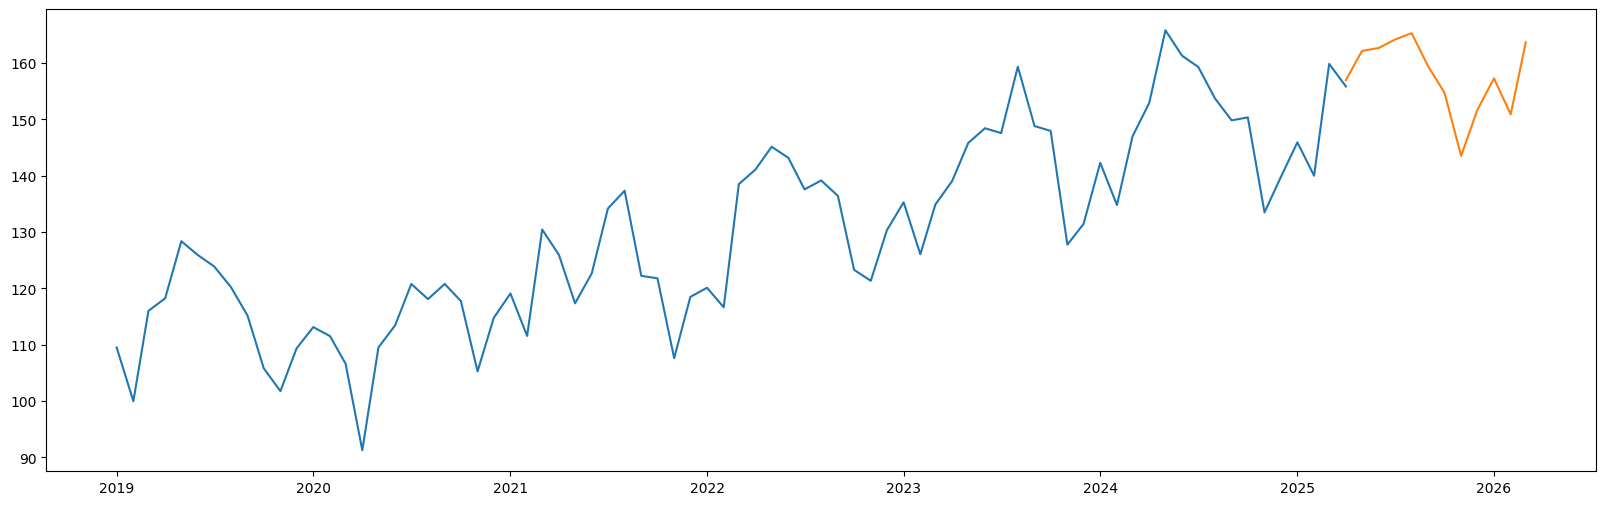

In [98]:
x2 = df2["DATE"]
y2 = df2["Value"]
# Final Prediction Graph
#Predicted part colored in orange
plt.rcParams["figure.figsize"] = (20,6)
plt.plot(demand['Date'],demand['Demand (TWh)'])
plt.plot(x2,y2)